# Telco Customer Churn
(Tasa de cancelación de clientes de telecomunicaciones)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.base import TransformerMixin 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# CRISP-DM

## Business Understanding

* Predict the churn variable

## Data Understanding 
**EDA**

In [2]:
data_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
column_names = data_df.columns
column_names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Total charges is object but has numeric values, so we should change it to float64

#### **Reviewing if TotalCharges has any empty value**

In [6]:
data_df[data_df['TotalCharges'] ==  " "]['TotalCharges'].count()

11

#### **Count unique values of each column**

In [7]:
data_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#### **Review unique values of each column**


In [8]:
for name in column_names:
  print(name, ":", data_df[name].unique())
  print("\n")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender : ['Female' 'Male']


SeniorCitizen : [0 1]


Partner : ['Yes' 'No']


Dependents : ['No' 'Yes']


tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService : ['No' 'Yes']


MultipleLines : ['No phone service' 'No' 'Yes']


InternetService : ['DSL' 'Fiber optic' 'No']


OnlineSecurity : ['No' 'Yes' 'No internet service']


OnlineBackup : ['Yes' 'No' 'No internet service']


DeviceProtection : ['No' 'Yes' 'No internet service']


TechSupport : ['No' 'Yes' 'No internet service']


StreamingTV : ['No' 'Yes' 'No internet service']


StreamingMovies : ['No' 'Yes' 'No internet service']


Contract : ['Month-to-month' 'One year' 'Two year']


PaperlessBilling : ['Yes' 'No']


PaymentMethod : ['Electro

#### **Categorical values**

In [9]:
categorical_names = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'gender', 
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'SeniorCitizen']
data_df[categorical_names].head(5)

,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,SeniorCitizen
0,Yes,No,No,Yes,No,Female,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,0
1,No,No,Yes,No,No,Male,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,0
2,No,No,Yes,Yes,Yes,Male,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,0
3,No,No,No,No,No,Male,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),0
4,No,No,Yes,Yes,Yes,Female,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,0


#### **Description of the dataframe**

In [10]:
data_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### **Reviewing services**

In [11]:
service_df = data_df.loc[:, ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']]
service_df.head(5)

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,No,No phone service,DSL,No,Yes,No,No
1,Yes,No,DSL,Yes,No,Yes,No
2,Yes,No,DSL,Yes,Yes,No,No
3,No,No phone service,DSL,Yes,No,Yes,Yes
4,Yes,No,Fiber optic,No,No,No,No


### Data Visualization

#### **Churn**

<AxesSubplot:ylabel='Churn'>

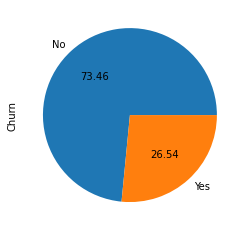

In [12]:
data_df['Churn'].value_counts().plot(kind='pie',autopct='%.2f')

* There is 26.58 churn customers

#### **Churn behavior vs tenure**

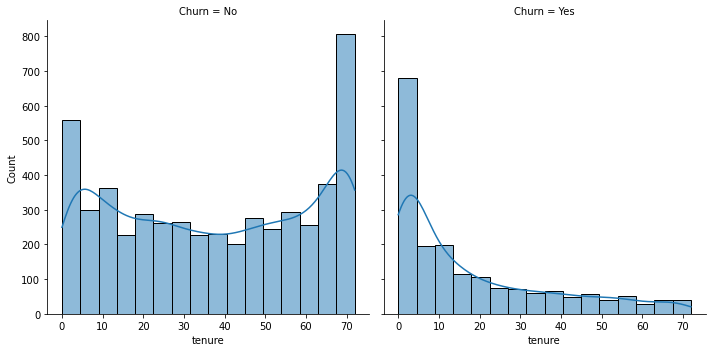

In [13]:
sns.displot(data=data_df,x='tenure',col='Churn',kde=True)

* Most of the churn customers stayed fewer months with the company.

#### **Contracts vs churn behavior**

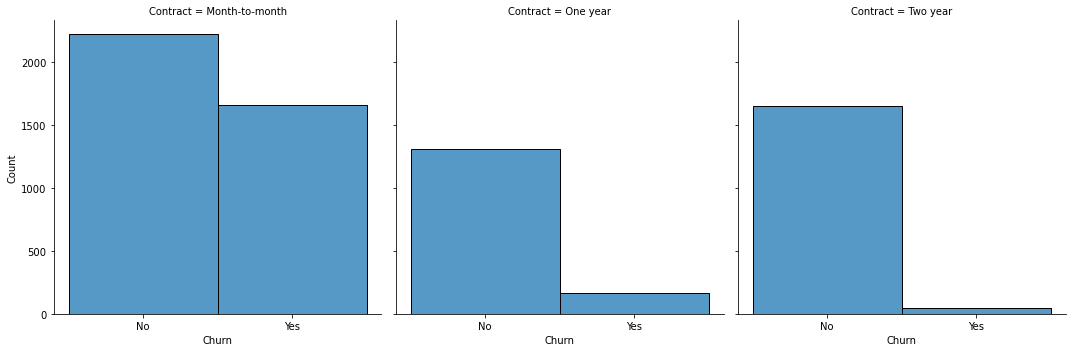

In [14]:
sns.displot(data=data_df,x='Churn',col='Contract')

* Most of the churn customers are the ones with month-to-month contracts.

#### **Contracts vs tenure**

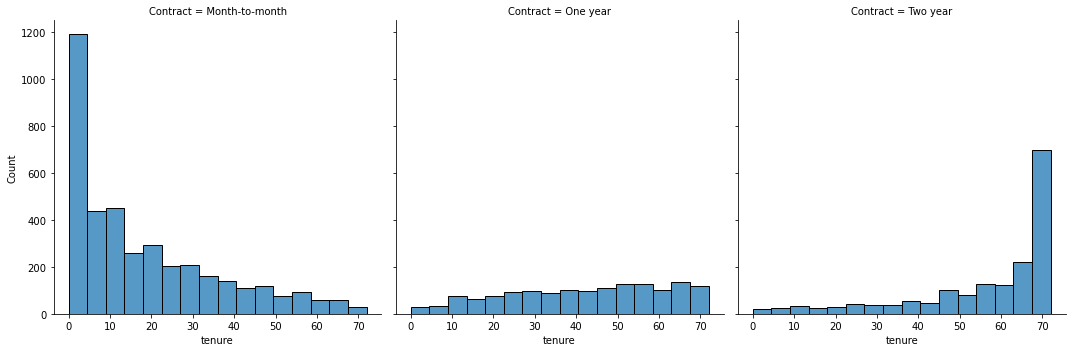

In [15]:
sns.displot(data=data_df, x='tenure', col='Contract')

* We can see that the most loyal customers have two-year contracts.


#### **Services vs Churn**

In [16]:
def plot_bar_graph(df, hue, ax):
    for feature, subplot in zip(df.columns, ax.flatten()):
        sns.countplot(df[feature], ax=subplot, hue=hue)

C:\Users\Alejandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alejandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alejandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alejandra\

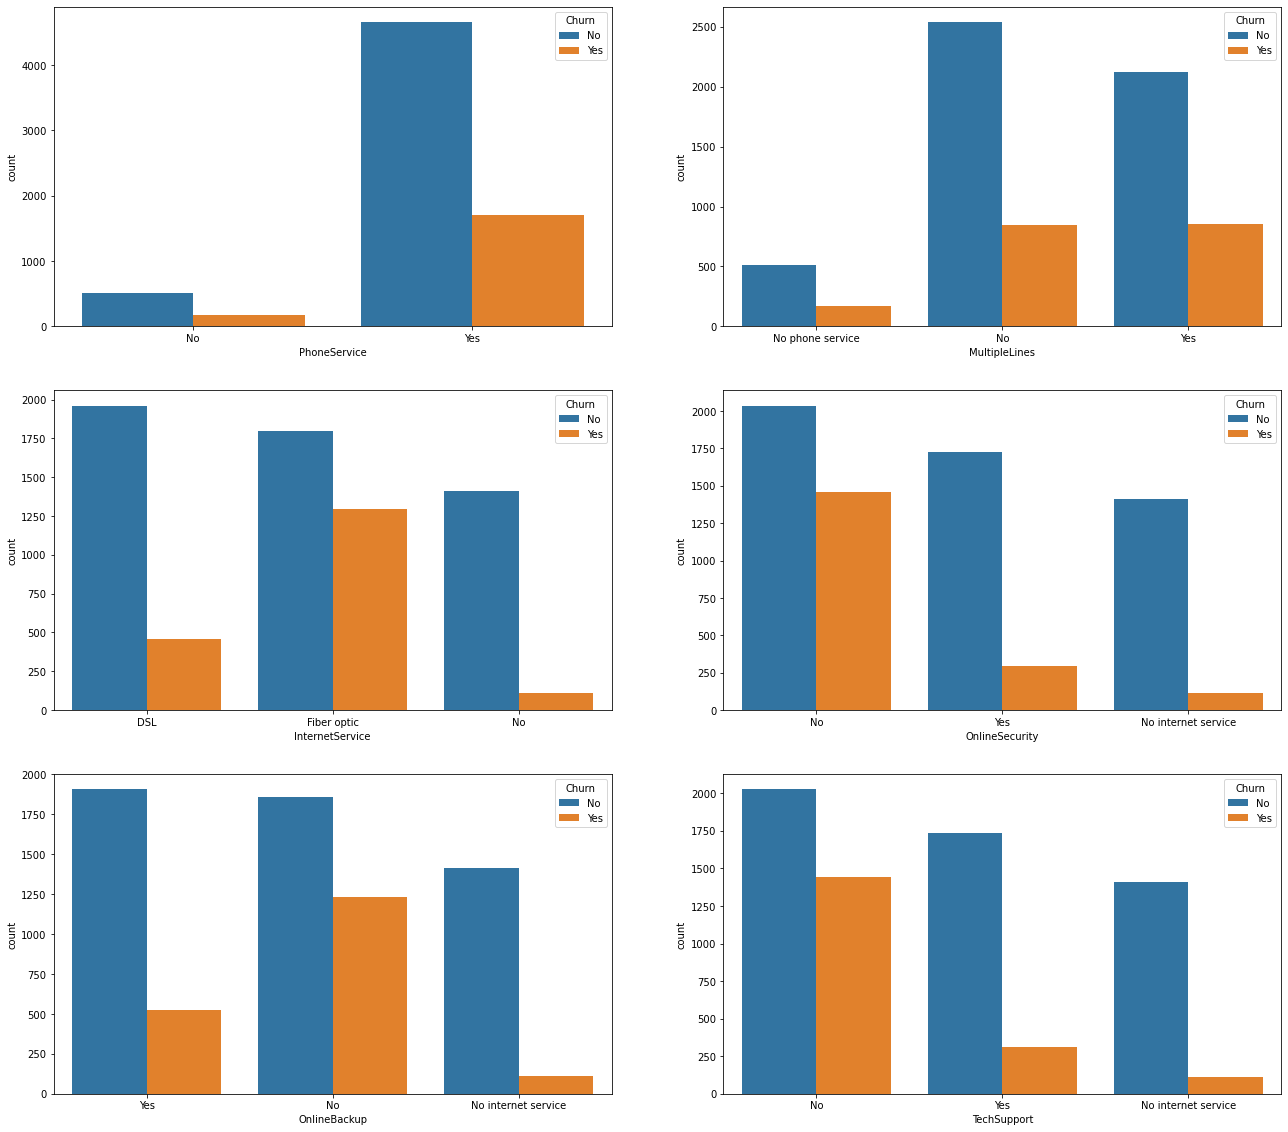

In [17]:
services_df = data_df[['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'TechSupport']]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(22,20))
plot_bar_graph(services_df, data_df['Churn'], ax)

* Approximately half of the clients that have fiberoptic leave the company.
* Customers with no internet service have a lower churn rate.
* Customers with no online service are most likely to leave.
* Customers with no online backup are most likely to leave.
* Approximately half of the people who do not receive technical support leave the company.

#### **Other variables vs Churn**

C:\Users\Alejandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alejandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alejandra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alejandra\

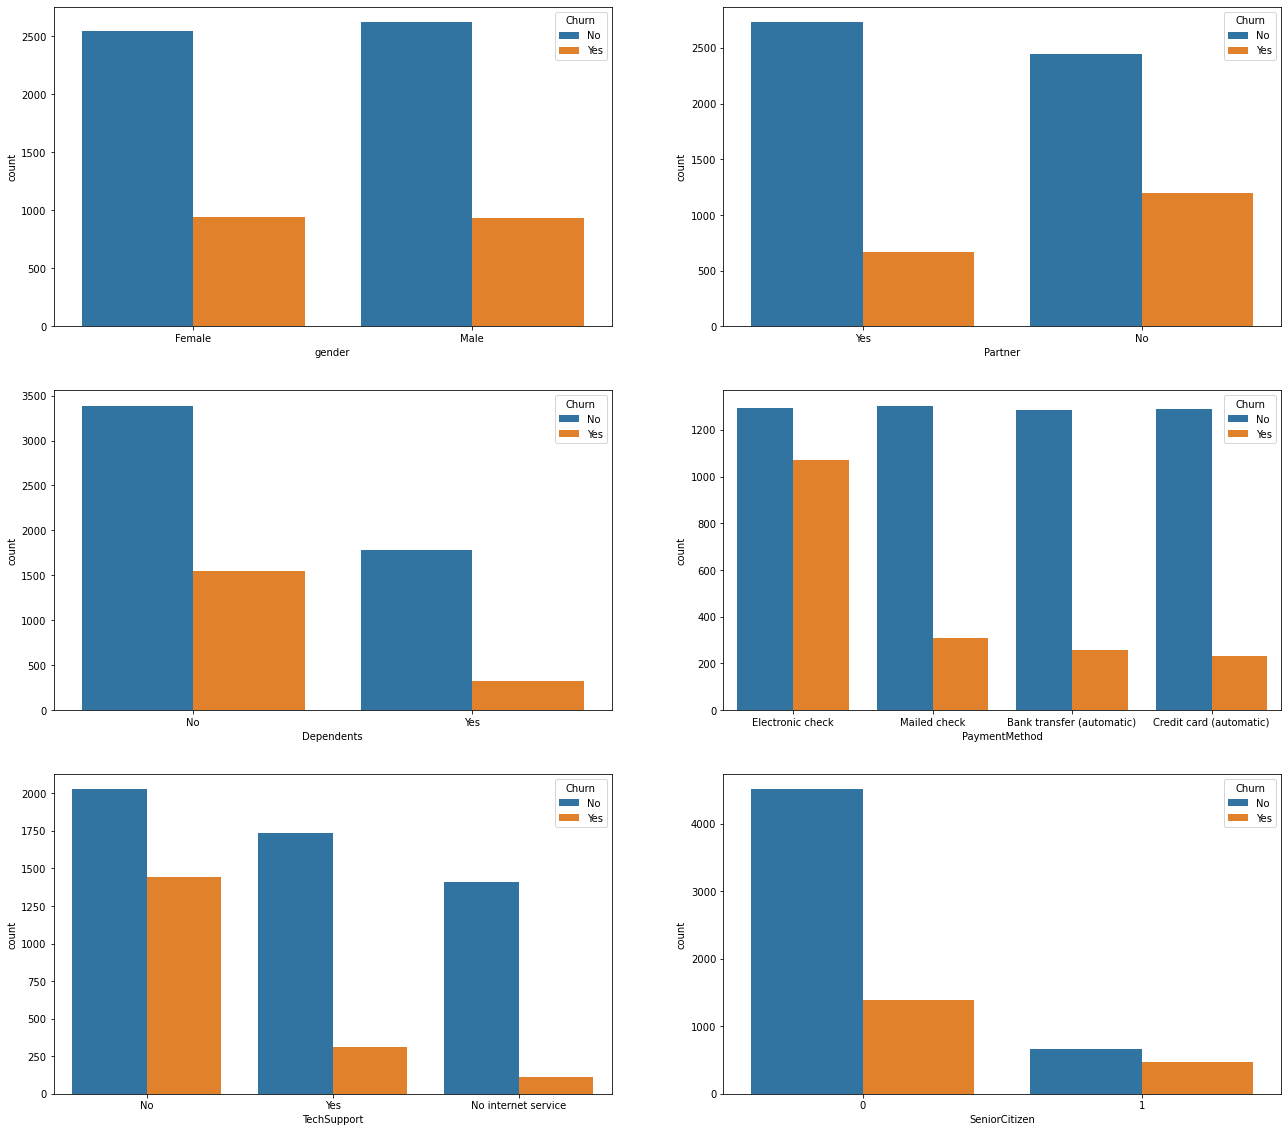

In [18]:
fig,ax=plt.subplots(nrows=3, ncols=2, figsize=(22,20))

df=data_df[['gender','Partner','Dependents', 'PaymentMethod', 'TechSupport', 'SeniorCitizen']]
plot_bar_graph(df, data_df['Churn'], ax)

* Gender seems not to influence the results.
* The is more churn customers that were not partners than the partners.
* Customers who pay the bill through electronic check are more likely to churn.
* Approximately half of the clients that are senior citizens leave the company.

#### **Reviewing outliers**

In [19]:
non_categorical_names = set(column_names) - set(categorical_names)
non_categorical_names = list(non_categorical_names)
non_categorical_names.remove('TotalCharges')
non_categorical_names.remove('customerID')
non_categorical_names

['MonthlyCharges', 'tenure']

<AxesSubplot:>

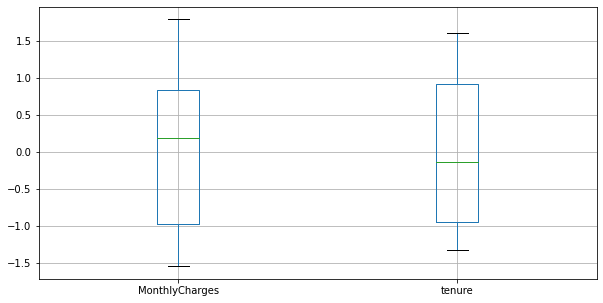

In [20]:
fig = plt.figure(figsize=(10,5))
ax =plt.gca()
pd.DataFrame(scale(data_df[non_categorical_names]),columns=non_categorical_names).boxplot(ax=ax)

<ipython-input-21-0e194e4a1731>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_df[non_categorical_names].hist(ax=ax,bins=20)


array([[<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'tenure'}>]], dtype=object)

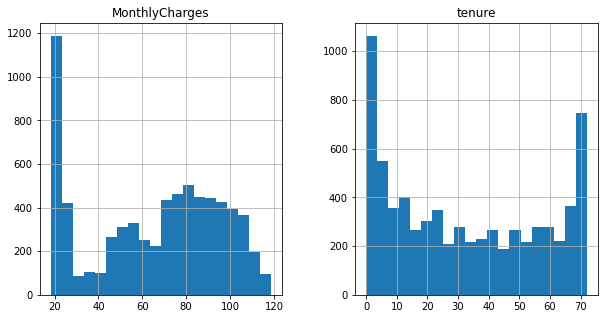

In [21]:
fig = plt.figure(figsize=(10,5))
ax =plt.gca()
data_df[non_categorical_names].hist(ax=ax,bins=20)

## Data Preparation

#### **Delete rows that have empty string in TotalCharges**

In [22]:
data_df.drop(data_df[data_df.TotalCharges == " "].index, inplace = True)
data_df.shape

(7032, 21)

#### **Update the type of TotalCharges to float**

In [23]:
data_df["TotalCharges"] = pd.to_numeric(data_df["TotalCharges"], downcast="float")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### **Let's add how many services each customer has**

In [24]:
service_df['PhoneService'] = service_df['PhoneService'].map({'No':0, 'Yes':1})
service_df['MultipleLines'] = service_df['MultipleLines'].map({'No':0, 'Yes':1, 'No phone service':0})
service_df['InternetService'] = service_df['InternetService'].map({'No':0,'DSL':1, 'Fiber optic':1})
service_df['OnlineSecurity'] = service_df['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':0})
service_df['OnlineBackup'] = service_df['OnlineBackup'].map({'No':0,'Yes':1, 'No internet service':0})
service_df['DeviceProtection'] = service_df['DeviceProtection'].map({'No':0, 'Yes':1,'No internet service':0})
service_df['TechSupport'] = service_df['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':0})
service_df.head(5)

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
0,0,0,1,0,1,0,0
1,1,0,1,1,0,1,0
2,1,0,1,1,1,0,0
3,0,0,1,1,0,1,1
4,1,0,1,0,0,0,0


In [25]:
data_df['TotalService'] = service_df.sum(axis=1)

In [26]:
data_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalService
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,2


#### **Converting categorical values to dummy variables**

In [27]:
data_df[categorical_names].head()

,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,SeniorCitizen
0,Yes,No,No,Yes,No,Female,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,0
1,No,No,Yes,No,No,Male,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,0
2,No,No,Yes,Yes,Yes,Male,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,0
3,No,No,No,No,No,Male,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),0
4,No,No,Yes,Yes,Yes,Female,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,0


In [28]:
map_values = {
    'No' : 0,
    'Yes': 1
}

In [29]:
data_df['Partner'] = data_df['Partner'].map(map_values)
data_df['Dependents'] = data_df['Dependents'].map(map_values)
data_df['PhoneService'] = data_df['PhoneService'].map(map_values)
data_df['PaperlessBilling'] = data_df['PaperlessBilling'].map(map_values)
data_df['Churn'] = data_df['Churn'].map(map_values)

In [30]:
data_df['gender'] = data_df['gender'].map({'Female':0,'Male':1})
data_df['MultipleLines'] = data_df['MultipleLines'].map({'No':0, 'Yes':1, 'No phone service':2})
data_df['InternetService'] = data_df['InternetService'].map({'No':0, 'DSL':1, 'Fiber optic':2})
data_df['OnlineSecurity'] = data_df['OnlineSecurity'].map({'No':0, 'Yes':1, 'No internet service':2})
data_df['OnlineBackup'] = data_df['OnlineBackup'].map({'No':0, 'Yes':1, 'No internet service':2})
data_df['DeviceProtection'] = data_df['DeviceProtection'].map({'No':0, 'Yes':1,'No internet service':2})
data_df['TechSupport'] = data_df['TechSupport'].map({'No':0, 'Yes':1, 'No internet service':2})
data_df['StreamingTV'] = data_df['StreamingTV'].map({'No':0, 'Yes':1, 'No internet service':2})
data_df['StreamingMovies'] = data_df['StreamingMovies'].map({'No':0, 'Yes':1, 'No internet service':2})
data_df['Contract'] = data_df['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
data_df['PaymentMethod'] = data_df['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})

In [31]:
data_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalService
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,1,0,29.85,29.850000,0,2
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,0,0,1,0,1,56.95,1889.500000,0,4
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,1,1,53.85,108.150002,1,4
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,0,0,1,0,2,42.30,1840.750000,0,4
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,1,0,70.70,151.649994,1,2


In [32]:
column_names = data_df.columns

#### **Removing customerID**

In [33]:
data_df = data_df.drop('customerID', axis=1)
data_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalService
0,0,0,1,0,1,0,2,1,0,1,...,0,0,0,0,1,0,29.85,29.850000,0,2
1,1,0,0,0,34,1,0,1,1,0,...,0,0,0,1,0,1,56.95,1889.500000,0,4
2,1,0,0,0,2,1,0,1,1,1,...,0,0,0,0,1,1,53.85,108.150002,1,4
3,1,0,0,0,45,0,2,1,1,0,...,1,0,0,1,0,2,42.30,1840.750000,0,4
4,0,0,0,0,2,1,0,2,0,0,...,0,0,0,0,1,0,70.70,151.649994,1,2


#### **We will delete gender because, as it was seen in the data understanding, it did not affect the results.**

In [34]:
data_df = data_df.drop('gender', axis=1)
data_df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalService
0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.850000,0,2
1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.500000,0,4
2,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.150002,1,4
3,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.750000,0,4
4,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.649994,1,2


#### **Update categorical and non categorical names**

In [35]:
non_categorical_names = set(column_names) - set(categorical_names)
non_categorical_names.remove('customerID')
non_categorical_names = list(non_categorical_names)
non_categorical_names

['TotalService', 'MonthlyCharges', 'tenure', 'TotalCharges']

In [36]:
categorical_names.remove('gender')
categorical_names

['Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'SeniorCitizen']

## Data Understanding

* After data preparation, we want to review the outliers again.

#### **Review outliers after data preprocessing**

<AxesSubplot:>

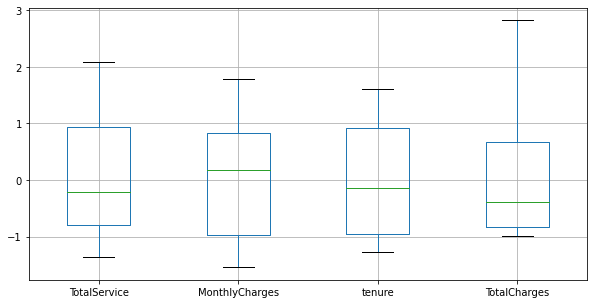

In [37]:
fig = plt.figure(figsize=(10,5))
ax =plt.gca()
pd.DataFrame(scale(data_df[non_categorical_names]),columns=non_categorical_names).boxplot(ax=ax)

<ipython-input-38-0e194e4a1731>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_df[non_categorical_names].hist(ax=ax,bins=20)


array([[<AxesSubplot:title={'center':'TotalService'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

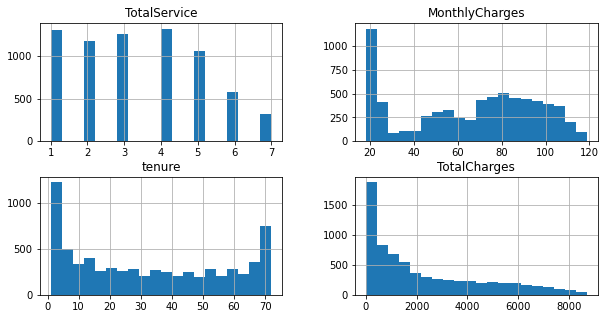

In [38]:
fig = plt.figure(figsize=(10,5))
ax =plt.gca()
data_df[non_categorical_names].hist(ax=ax,bins=20)

## Data preparation

* Review if any data will be deleted using quantiles

#### **Use quartiles to delete outliers**

In [39]:
def delete_outliers(df, name):
    q1 = df[name].quantile(0.25)
    q3 = df[name].quantile(0.75)
    iqr = q3 - q1
    toprange = q3 + iqr * 1.5
    botrange = q3 - iqr * 1.5

    df = data_df.drop(df[df[name] > toprange].index)
    df = data_df.drop(df[df[name] < botrange].index)
    
    return df

for name in non_categorical_names:
    data_df = delete_outliers(data_df, name)

data_df.shape

(7032, 20)

* No data was deleted

## Modeling

In [40]:
#Move "Churn" to be the last column
churn_column = data_df.pop('Churn')
pos = data_df.shape[1]
data_df.insert(pos, 'Churn', churn_column)
data_df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TotalService,Churn
0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,29.850000,2,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.500000,4,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.150002,4,1
3,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,1840.750000,4,0
4,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.649994,2,1


#### **Delete Churn from categorical variables**

In [41]:
categorical_names = set(categorical_names) - set({'Churn'})
categorical_names = list(categorical_names)
categorical_names

['Partner',
 'PaymentMethod',
 'TechSupport',
 'Dependents',
 'StreamingTV',
 'SeniorCitizen',
 'StreamingMovies',
 'DeviceProtection',
 'OnlineSecurity',
 'Contract',
 'InternetService',
 'OnlineBackup',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines']

### Logist Regression

In [42]:
regularization = 0.001
class_weight = "balanced"
random_state = 10
max_iter =1000
pipe = Pipeline([('feats',FeatureUnion([
    ('num_vars',Pipeline([('num_selector',ColumnTransformer([("selector","passthrough",non_categorical_names)],remainder="drop")),('scaler',StandardScaler())])),
    ('cat_vars',Pipeline([('cat_selector',ColumnTransformer([("selector","passthrough",categorical_names)],remainder="drop")),('dummy',OneHotEncoder(handle_unknown="ignore"))]))]
)),('model',LogisticRegression(C=regularization,class_weight=class_weight,random_state=random_state,max_iter=max_iter))])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_df.iloc[:,:-1], data_df.iloc[:,-1],test_size=0.25)

#### **Train model**

In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('feats',
                 FeatureUnion(transformer_list=[('num_vars',
                                                 Pipeline(steps=[('num_selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['TotalService',
                                                                                                    'MonthlyCharges',
                                                                                                    'tenure',
                                                                                                    'TotalCharges'])])),
                                                                 ('scaler',
                                                                 

#### **Predict test set**

In [45]:
y_pred = pipe.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1304
           1       0.50      0.76      0.60       454

    accuracy                           0.74      1758
   macro avg       0.70      0.75      0.70      1758
weighted avg       0.79      0.74      0.75      1758



#### **Plot results**

In [47]:
cm = confusion_matrix(y_pred,y_test)

<AxesSubplot:>

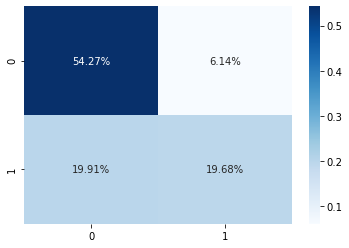

In [48]:
sns.heatmap(cm/np.sum(cm),annot=True,fmt='.2%',cmap="Blues")

## Evaluation

## Deploy